## 1. Classification

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [50]:
data = load_breast_cancer()

In [51]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [52]:
data.data.shape

(569, 30)

In [53]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
data.target.shape

(569,)

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2)

In [56]:
N, D = x_train.shape
x_train.shape

(455, 30)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## alternatively 
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape(0,), activation='sigmoid' ))

model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])


r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print('Train score: ', model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 1s 2ms/sample - loss: 0.5878 - accuracy: 0.6835 - val_loss: 0.5299 - val_accuracy: 0.7719
Epoch 2/100
455/455 [==============================] - 0s 126us/sample - loss: 0.5226 - accuracy: 0.7582 - val_loss: 0.4812 - val_accuracy: 0.7982
Epoch 3/100
455/455 [==============================] - 0s 153us/sample - loss: 0.4710 - accuracy: 0.8066 - val_loss: 0.4413 - val_accuracy: 0.8509
Epoch 4/100
455/455 [==============================] - 0s 158us/sample - loss: 0.4284 - accuracy: 0.8374 - val_loss: 0.4095 - val_accuracy: 0.8596
Epoch 5/100
455/455 [==============================] - 0s 156us/sample - loss: 0.3940 - accuracy: 0.8549 - val_loss: 0.3830 - val_accuracy: 0.8947
Epoch 6/100
455/455 [==============================] - 0s 132us/sample - loss: 0.3656 - accuracy: 0.8725 - val_loss: 0.3606 - val_accuracy: 0.8947
Epoch 7/100
455/455 [==============================] - 0s 203us/sample - l

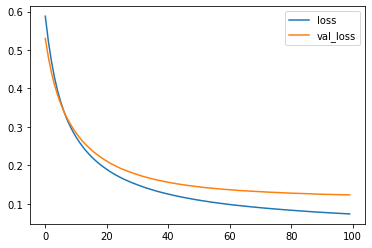

In [59]:
import matplotlib.pylab as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

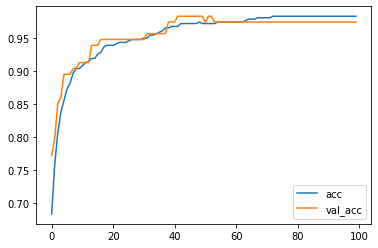

In [60]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## 2. Regression

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [62]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-25 07:48:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...199.232.20.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.20.133|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-25 07:49:00 (19.2 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [63]:
data = pd.read_csv('moore.csv', header=None).values
data.shape

(162, 2)

In [64]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

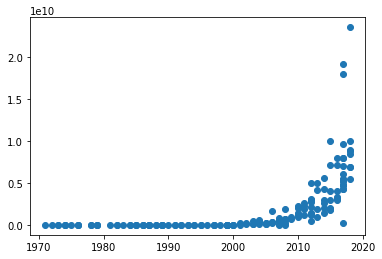

In [65]:
plt.scatter(X, Y)

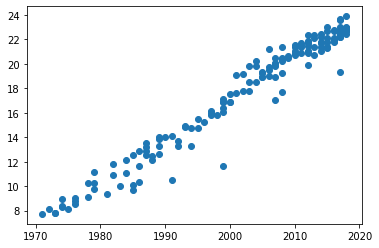

In [66]:
Y = np.log(Y)
plt.scatter(X, Y)

In [67]:
X = X - X.mean()

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


F = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 3ms/sample - loss: 482.2618
Epoch 2/200
162/162 [==============================] - 0s 113us/sample - loss: 353.3385
Epoch 3/200
162/162 [==============================] - 0s 103us/sample - loss: 252.2619
Epoch 4/200
162/162 [==============================] - 0s 116us/sample - loss: 213.7624
Epoch 5/200
162/162 [==============================] - 0s 112us/sample - loss: 196.8673
Epoch 6/200
162/162 [==============================] - 0s 139us/sample - loss: 150.8095
Epoch 7/200
162/162 [==============================] - 0s 111us/sample - loss: 118.6385
Epoch 8/200
162/162 [==============================] - 0s 144us/sample - loss: 72.8907
Epoch 9/200
162/162 [==============================] - 0s 133us/sample - loss: 63.9307
Epoch 10/200
162/162 [==============================] - 0s 112us/sample - loss: 35.0210
Epoch 11/200
162/162 [==============================] - 0s 135us/sample - loss: 27.4205
Epoch 12/200
16

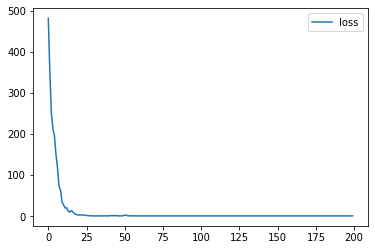

In [69]:
plt.plot(F.history['loss'], label='loss')
# plt.plot(F.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [29]:
print(model.layers)

In [30]:
print(model.layers[0].get_weights())

[array([[0.3434202]], dtype=float32), array([17.751453], dtype=float32)]


In [42]:
p = model.predict(X_test)

In [46]:
print(p)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]


In [44]:
import numpy as np 
p = np.round(p).flatten()
print(p)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]


In [45]:
print(np.mean(p==y_test))

0.9736842105263158


## 3. Making prediction

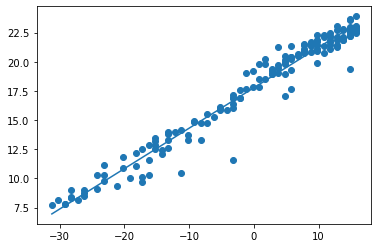

In [70]:
yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, yhat)

In [71]:
model.save("linearclassifier.h5")

In [72]:
!ls

1.CV.pdf
'1. DL.pdf'
 1.ML.pdf
 1.NLP.pdf
'Computer Vision- Algorithms and Applications.pdf'
'[FreeTutorials.Eu] Udemy - NLP - Natural Language Processing with Python'
 linear-classification
 linearclassifier.h5
 moore.csv
 moore.csv.1


In [73]:
# if there is an input layer it causes error
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)


## 4. MNIST database

In [74]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test/ 255.0 

11493376/11490434 [==============================] - 28s 2us/step


In [75]:
x_train.shape

(60000, 28, 28)

In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [77]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [78]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2982 - accuracy: 0.9129 - val_loss: 0.1400 - val_accuracy: 0.9554


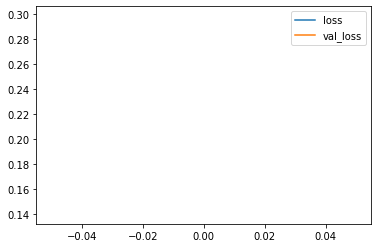

In [81]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

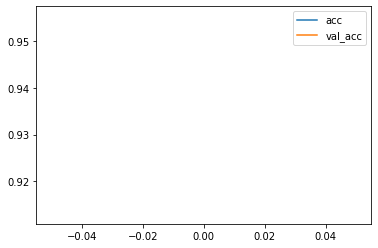

In [80]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 965    0    0    2    0    2    7    1    2    1]
 [   0 1119    4    1    0    1    2    0    8    0]
 [   8    2  979   12    5    0    5    8   12    1]
 [   0    0    7  974    0    6    1   11    6    5]
 [   1    1    6    0  929    0    3    2    3   37]
 [   5    1    0   33    2  823    9    3    9    7]
 [  10    3    2    1    7    7  921    0    7    0]
 [   0   11   13    4    3    1    0  972    1   23]
 [   3    2    4   24    4    8    5    7  910    7]
 [   5    6    1   14   13    0    0    6    2  962]]


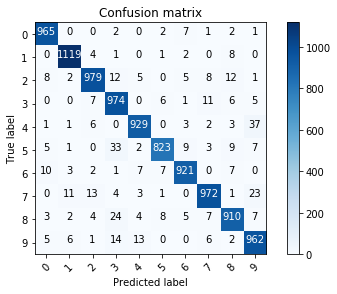

In [82]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

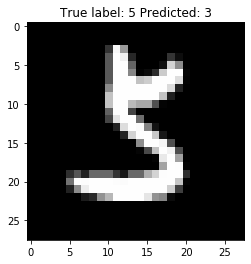

In [84]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
from mpl_toolkits.mplot3d import Axes3D